<a href="https://colab.research.google.com/github/Igli333/data-science/blob/main/Lab_1_DS_Igli_Balla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium webdriver-manager selenium-stealth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,596 kB]
Get:14 h

In [ ]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
from selenium_stealth import stealth
from selenium import webdriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

import pandas as pd
import re
from webdriver_manager.chrome import ChromeDriverManager

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.set_capability("browserVersion", "114.0.5735.90")
chrome_options.add_argument("--window-size=2560,1440")

driver = webdriver.Chrome(options=chrome_options)

stealth(driver,
    languages=["en-US", "en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)

In [ ]:
import os
import geopy.distance
from geopy.geocoders import Nominatim

can_read_csv = True
vienna_center_coordinates = [48.20849, 16.37307]
geolocator = Nominatim(user_agent="my-app")

if os.path.exists('hotels.csv') and os.path.getsize('hotels.csv') > 0:
    hotels = pd.read_csv('hotels.csv')
else:
    hotels = pd.DataFrame()
    can_read_csv = False


if not can_read_csv:
    url = "https://www.google.com/travel/search?q=vienna&ts=CAESCgoCCAMKAggDEAAaWwo9EjkKCC9tLzBmaHA5MiUweDQ3NmQwNzllNTEzNmNhOWY6MHhmZGMyZTU4YTUxYTI1YjQ2OgZWaWVubmEaABIaEhQKBwjoDxAKGAwSBwjoDxAKGA0YATICCAEqEwoPEgQCAwQFOgNFVVJiAggBGgA&ved=0CAAQ5JsGahgKEwiYp46brfCIAxUAAAAAHQAAAAAQggM&ictx=3&gsas=1&ap=MAE&qs=CAEgACgAOA1IAA"
    driver.get(url)

    hotel_links = {}

    while True:
        for j in range(4, 24):
            link = None
            try:
                hotel = driver.find_element(By.XPATH, f'//*[@id="id"]/c-wiz/c-wiz[{j}]/div')
                link_key = hotel.find_element(By.XPATH, f'//*[@id="id"]/c-wiz/c-wiz[{j}]/div/a').get_attribute('aria-label')
                link = hotel.find_element(By.XPATH, f'//*[@id="id"]/c-wiz/c-wiz[{j}]/div/a').get_attribute('href')
                price = hotel.find_element(By.XPATH, f'//*[@id="id"]/c-wiz/c-wiz[{j}]/div/div/div/div[1]/div/div[1]/div[2]/div/a/div/div/div/span[1]/span/span[1]').text
                if price == '':
                	continue
            except:
                continue

            hotel_links[link_key] = {'price': price, 'link': link}

        if len(hotel_links) > 50:
            break

        try:
          driver.find_element(By.XPATH, '//*[@id="id"]/c-wiz/c-wiz[23]/div[1]/button[2]').click()
        except:
          driver.find_element(By.XPATH, '//*[@id="id"]/c-wiz/c-wiz[23]/div[1]/button').click()


    for link_key in hotel_links:
      driver.get(hotel_links[link_key]['link'])
      name = driver.find_element(By.XPATH,'//*[@id="yDmH0d"]/c-wiz[2]/div/c-wiz/div[1]/div[2]/div[2]/div[1]/div[1]/c-wiz/div/h1').text
      try:
        address = driver.find_element(By.XPATH, '//*[@id="overview"]/c-wiz[1]/c-wiz[1]/div/section/div[1]/div[1]/div/div[2]/span[1]').text
      except:
        try:
          address = driver.find_element(By.XPATH, '//*[@id="overview"]/c-wiz[1]/c-wiz[1]/div/section/div[1]/div[1]/div/div[2]/span').text
        except:
          address = ''

      if address != '':
        try:
          location = geolocator.geocode(address)
          distance_from_center = geopy.distance.geodesic(vienna_center_coordinates, location.point).km
        except:
          continue
      else:
        continue

      try:
        review_rating = float(driver.find_element(By.XPATH, '//*[@id="overview"]/c-wiz[1]/c-wiz[1]/div/section/div[1]/div[1]/div/div[1]/span/span/span[1]').text)
      except:
        review_rating = -1

      try:
        hotel_rating = driver.find_element(By.XPATH, '//*[@id="overview"]/c-wiz[1]/c-wiz[1]/div/section/div[1]/div[1]/div/div[1]/span[3]').text
      except:
        hotel_rating = 'Not Rated'

      try:
        summary = driver.find_element(By.XPATH, '//*[@id="overview"]/c-wiz[1]/c-wiz[14]/div/section/div/div[1]/p').text
      except:
        summary = ''

      photos = []
      for i in range(1, 4):
        photos.append(driver.find_element(By.XPATH,f'//*[@id="overview"]/c-wiz[1]/c-wiz[2]/div/div/div/div[1]/div[1]/div/div/div[{i}]/img').get_attribute('src'))

      hotel = {
          'name': name,
          'address': address,
          'distance_from_center(km)': distance_from_center,
          'price_per_night(€)': float(hotel_links[link_key]['price'].replace('€', '')),
          'review_rating': review_rating,
          'hotel_rating': hotel_rating,
          'summary': summary,
          'photos': photos
      }
      # print(hotel)

      hotels = pd.concat([hotels, pd.DataFrame([hotel])], ignore_index=True)

    # hotels = hotels.drop_duplicates('name', keep='last')
    hotels.to_csv('hotels.csv', index=False)
else:
    hotels = pd.read_csv('hotels.csv')

In [ ]:
hotels.head()

,name,address,distance_from_center(km),price_per_night(€),review_rating,hotel_rating,summary,photos
0,Austria Trend Parkhotel Schönbrunn,"Hietzinger Hauptstraße 10, 1130 Wien, Austria",5.777288,112.0,4.5,4-star hotel,,[https://lh3.googleusercontent.com/proxy/wuS5j...
1,Anantara Palais Hansen Vienna Hotel,"Schottenring 24/1010, 1010 Wien, Austria",0.938886,386.0,4.6,5-star hotel,,[https://lh5.googleusercontent.com/p/AF1QipN36...
2,Hotel Regina,"Rooseveltplatz 15, 1090 Wien, Austria",1.318742,194.0,4.3,4-star hotel,"Built in 1877, this genteel hotel opposite the...",[https://lh6.googleusercontent.com/proxy/YAPy7...
3,Leonardo Hotel Vienna Hauptbahnhof,"Gerhard-Bronner-Straße 5, 1100 Wien, Austria",2.811893,135.0,4.3,4-star hotel,"A 2-minute walk from Wien Hbf train station, t...",[https://lh3.googleusercontent.com/proxy/a5f2q...
4,"Hotel Bristol, a Luxury Collection Hotel, Vienna","Kärntner Ring 1, 1010 Wien, Austria",0.678243,455.0,4.6,5-star hotel,,[https://lh3.googleusercontent.com/proxy/leZY9...


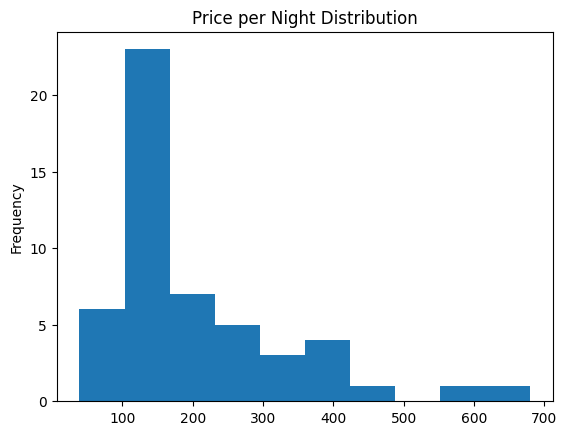

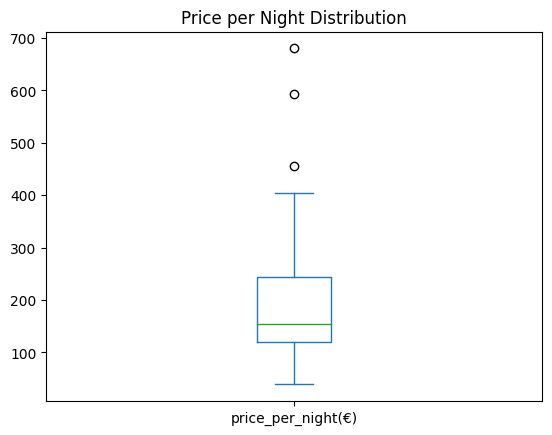

In [ ]:
import matplotlib.pyplot as plt

hotels['price_per_night(€)'].plot(kind='hist', title='Price per Night Distribution')
plt.show()

hotels['price_per_night(€)'].plot(kind='box', title='Price per Night Distribution')
plt.show()

In [ ]:
hotels['distance_from_center(km)'].plot(kind='hist', title='Distance From Center Distribution')
plt.xlabel('Distance from Center (km)')
plt.ylabel('No. of Hotels')
plt.show()

hotels['distance_from_center(km)'].plot(kind='box', title='Distance From Center Box Plot')
plt.show()

NameError: name 'hotels' is not defined

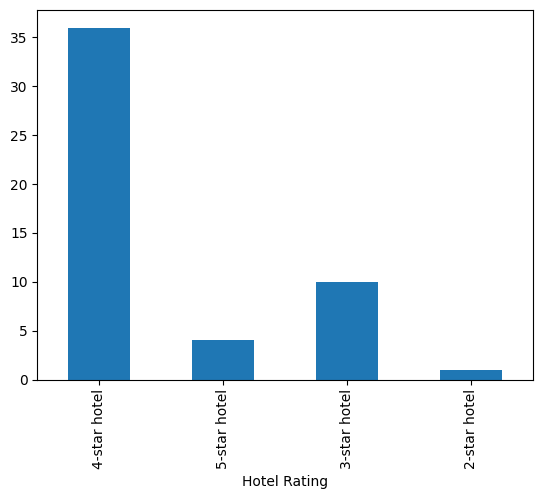

In [ ]:
from collections import Counter

key_count = Counter(hotels[hotels['hotel_rating'] != '']['hotel_rating'])
key_counts_df = pd.DataFrame(key_count.items(), columns=['Hotel Rating', 'Hotels'])
key_counts_df.plot(kind='bar', x='Hotel Rating', y='Hotels', legend=False)
plt.show()

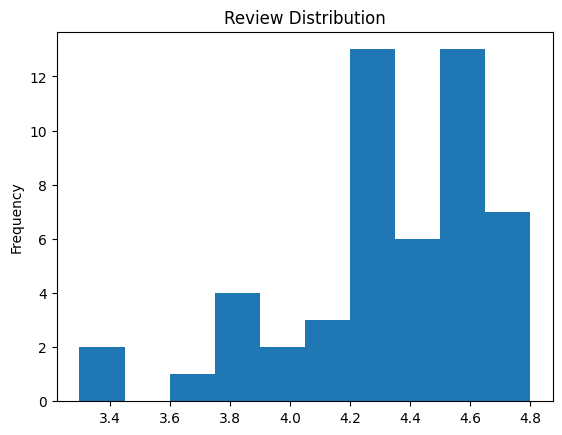

In [ ]:
hotels['review_rating'].plot(kind='hist', title='Review Distribution')
plt.show()

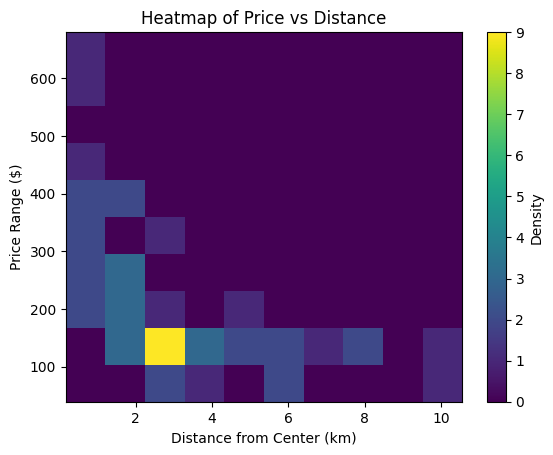

In [ ]:
plt.hist2d(hotels['distance_from_center(km)'], hotels['price_per_night(€)'])
plt.colorbar(label='Density')
plt.title('Heatmap of Price vs Distance')
plt.xlabel('Distance from Center (km)')
plt.ylabel('Price Range (€)')
plt.show()

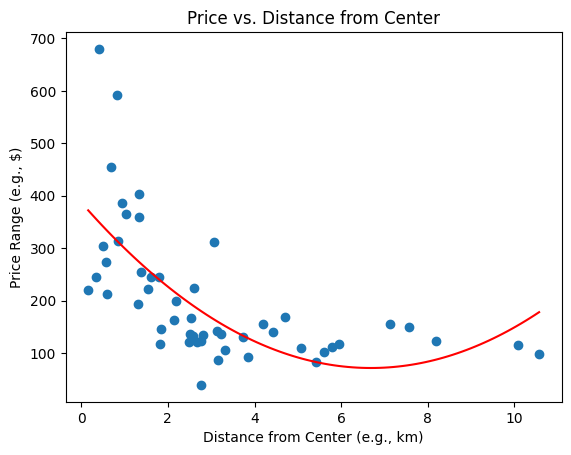

In [ ]:
import numpy as np

plt.scatter(hotels['distance_from_center(km)'], hotels['price_per_night(€)'])

coefficients = np.polyfit(hotels['distance_from_center(km)'], hotels['price_per_night(€)'], 2)

poly_function = np.poly1d(coefficients)

x_values = np.linspace(hotels['distance_from_center(km)'].min(), hotels['distance_from_center(km)'].max(), 100)

y_values = poly_function(x_values)

plt.plot(x_values, y_values, color='red')

plt.title('Price vs. Distance from Center')
plt.xlabel('Distance from Center (km)')
plt.ylabel('Price Range (€)')
plt.show()

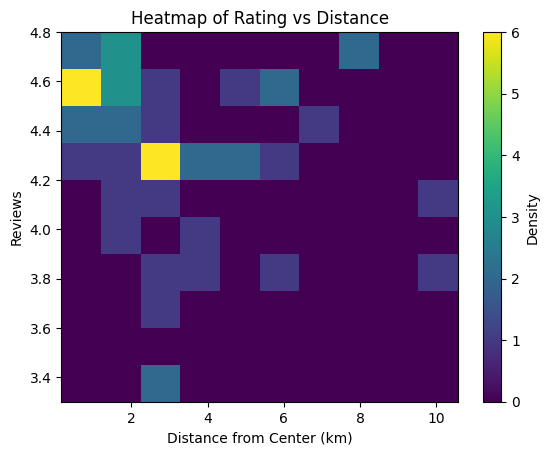

In [ ]:
plt.hist2d(hotels['distance_from_center(km)'], hotels['review_rating'])
plt.colorbar(label='Density')
plt.title('Heatmap of Rating vs Distance')
plt.xlabel('Distance from Center (km)')
plt.ylabel('Reviews')
plt.show()

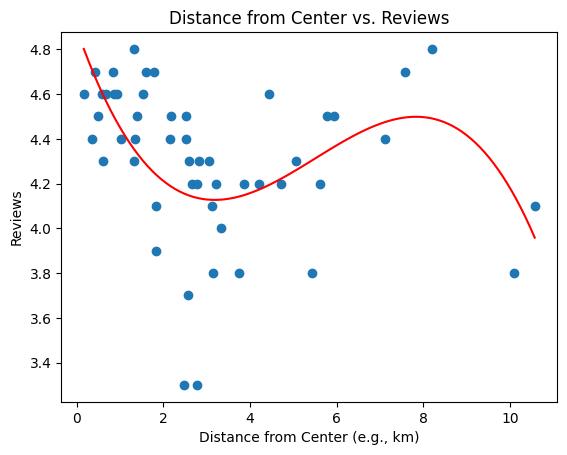

In [ ]:
plt.scatter(hotels['distance_from_center(km)'], hotels['review_rating'])

coefficients = np.polyfit(hotels['distance_from_center(km)'], hotels['review_rating'], 3)
poly_function = np.poly1d(coefficients)

x_values = np.linspace(hotels['distance_from_center(km)'].min(), hotels['distance_from_center(km)'].max(), 100)
y_values = poly_function(x_values)

plt.plot(x_values, y_values, color='red')

plt.title('Distance from Center vs. Reviews')
plt.xlabel('Distance from Center (e.g., km)')
plt.ylabel('Reviews')
plt.show()

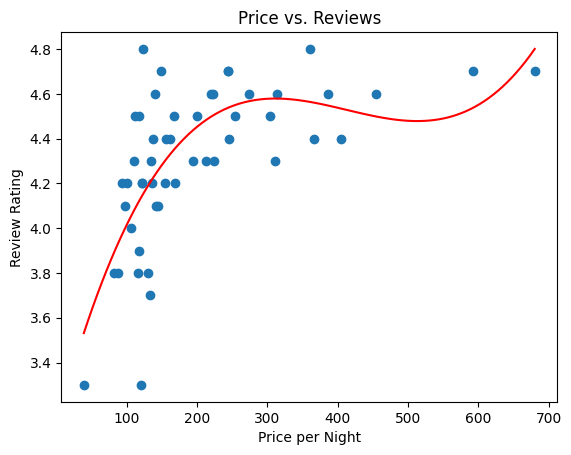

In [ ]:
plt.scatter(hotels['price_per_night(€)'], hotels['review_rating'])

coefficients = np.polyfit(hotels['price_per_night(€)'], hotels['review_rating'], 3)
poly_function = np.poly1d(coefficients)

x_values = np.linspace(hotels['price_per_night(€)'].min(), hotels['price_per_night(€)'].max(), 100)
y_values = poly_function(x_values)

plt.plot(x_values, y_values, color='red')

plt.title('Price vs. Reviews')
plt.xlabel('Price per Night')
plt.ylabel('Review Rating')
plt.show()

In [ ]:
print("Search for a hotel!")

price_start = int(input("price lower range: "))
price_end = int(input("price upper range: "))

distance_start = int(input("distance lower range: "))
distance_end = int(input("distance upper range: "))

rating_start = int(input("rating lower range: "))
rating_end = int(input("rating upper range: "))

result = hotels[(hotels['price_per_night(€)'] >= price_start)
                 & (hotels['price_per_night(€)'] <= price_end)
                 & (hotels['distance_from_center(km)'] >= distance_start)
                 & (hotels['distance_from_center(km)'] <= distance_end)
                 & (hotels['review_rating'] >= rating_start)
                 & (hotels['review_rating'] <= rating_end)]
result = result.sort_values(['price_per_night(€)'], ascending=True)

from IPython.display import HTML

def print_photos(paths):
  html = ''
  for path in paths:
    html += f'<img src="{path}" width="200">'
  return html

HTML(result.head(10).to_html(escape=False, formatters={
      'photos': lambda paths: print_photos(paths)
}))

Search for a hotel!
price lower range: 23
price upper range: 140
distance lower range: 2
distance upper range: 8
rating lower range: 3
rating upper range: 5


,name,address,distance_from_center(km),price_per_night(€),review_rating,hotel_rating,summary,photos
16,a&o Hostel Wien Stadthalle,"Lerchenfelder Gürtel 9-11, 1160 Wien, Austria",2.767033,39.0,3.3,3-star hotel,,
17,Lenas Donau Hotel,"Wagramer Str. 52, 1220 Wien, Austria",5.425714,82.0,3.8,3-star hotel,,
43,Do Step Inn,"Felberstraße 20, 1150 Wien, Austria",3.147179,87.0,3.8,2-star hotel,,
9,Hotel Lucia,"Hütteldorfer Str. 79, 1150 Wien, Austria",3.859970,93.0,4.2,3-star hotel,"A 14-minute walk from Wien West train station, this down-to-earth hotel is also 2 km from Schönbrunn Palace and 3.7 km from the Vienna State Opera.",
7,Austria Trend Hotel Bosei,"Gutheil-Schoder-Gasse 7b, 1100 Wien, Austria",5.606831,101.0,4.2,4-star hotel,"Adjacent to a golf course, this straightforward hotel in the Wienerberg district is a 9-minute walk from the nearest tram stop, 4 km from Schönbrunn Palace and 9 km from downtown Vienna.",
39,Rainers Hotel Vienna,"Gudrunstraße 184, 1100 Wien, Austria",3.326650,106.0,4.0,4-star hotel,,
8,JUFA Hotel Wien City,"Mautner-Markhof-Gasse 50, 1110 Wien, Austria",5.063386,110.0,4.3,4-star hotel,"Set a 7-minute walk from a metro stop, this relaxed hotel in a colorful, modern building is 4 km from the 18th-century Belvedere museum and 9 km from Schönbrunn Palace.",
0,Austria Trend Parkhotel Schönbrunn,"Hietzinger Hauptstraße 10, 1130 Wien, Austria",5.777288,112.0,4.5,4-star hotel,,
5,BASSENA Wien Donaustadt,"Dr.-Adolf-Schärf-Platz 6, 1220 Wien, Austria",5.941585,117.0,4.5,4-star hotel,,
19,Hotel am Schottenpoint,"Währinger Str. 22/3, 1090 Wien, Austria",2.482109,120.0,3.3,3-star hotel,"Among shops and eateries on a commercial street, this modest hotel is a 7-minute walk from an U-bahn station, 1 km from the Hofburg Palace complex and 2 km from St. Stephen's Cathedral.",
